# **Laserindusert fluourscens (LIF)**

Et eksempel på **et system av lineære differensialligninger i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

Når et molekyl absorberer en foton fra en laser, blir det eksitert til en høyere elektronisk eller vibrasjonsmessig tilstand. Populasjonen av molekyler i den eksiterte tilstanden utvikler seg over tid på grunn av:

1. **Spontan emisjon** – Molekylet går tilbake til grunntilstanden ved å sende ut en foton.  
2. **Stimuleret emisjon** – En annen foton med samme energi kan indusere molekylet til å sende ut lys.  
3. **Ikke-radiativ relaksasjon** – Molekylet mister energi uten å sende ut lys (f.eks. via kollisjoner eller intern konvertering).
4. **Eksitasjon** – Et molekyl i grunntillstanden absorberer en foton og går til den eksiterte tilstanden.

Denne typen populasjonsdynamikk er avgjørende for å forstå **reaksjonskinetikk, spektroskopi og fotokjemi**.

<div>
<img src="https://github.com/mbr085/V25MAT102/blob/main/notebooks/uke8/396px-Jablonski_Diagram_of_Fluorescence_Only.png?raw=1" width="300"/>
</div>

[Jablonski diagram av absorbans, ikke-radiativ henfall, og fluorescens. (Public Domain, Jacobkhed)](https://commons.wikimedia.org/w/index.php?curid=2268147)

<div>
<img src="https://github.com/mbr085/V25MAT102/blob/main/notebooks/uke8/Olympus-BX61-fluorescence_microscope.jpg?raw=1" width="300"/>
</div>

[An Olympus BX61 (epi-)fluorescence microscop coupled with a digital camera. (Public Domain)](https://en.wikipedia.org/wiki/Laser-induced_fluorescence)

### **Kontinuerlig tids populasjonsdynamikk med en overgangsmatrise**  
Vi
uttrykker populasjonsutviklingen som:  

$$
\vec v'(t) = A \cdot \vec v(t)
$$

hvor:

- $ \vec v(t) = \begin{bmatrix} v_g(t) \\ v_e(t) \end{bmatrix} $ representerer populasjonene ved tidspunkt $ t $.
- $ \vec v'(t) = \begin{bmatrix} v'_g(t) \\ v'_e(t) \end{bmatrix} $ representerer endringsratene til populasjonene ved tidspunkt $ t $.
- $ A $ er **overgangsmatrisen**, som bestemmer hvordan populasjonene endrer seg over tid.

Et enkelt valg for $ A $ er:

$$
A = \begin{bmatrix}
- p & q \\
p & - q
\end{bmatrix}
$$

hvor:
- $ p $ er sannsynligheten for overgang fra grunntilstanden til den eksiterte tilstanden.
- $ q $ er sannsynligheten for overgang fra den eksiterte tilstanden til grunntilstanden.

---

## **Natrium ($\text{Na}$)**  
Natriumatomer har en kjent elektronisk overgang:  
- **Grunntilstand:** $ 3s $  
- **Eksitert tilstand:** $ 3p $  

Dette gir en typisk LIF-prosess:  
$$
3s \xrightarrow{\text{Laser}} 3p \xrightarrow{\text{Fluorescens}} 3s + \text{foton}
$$
hvor atomet emitterer lys med bølgelengde **589 nm** (den gule natrium D-linjen).  

---

For en kraftig laser er
p = 0.2 og q = 0.5 i overgangsmatrisen realistiske verdier hvis tid regnes i enheter av nanosekunder slik at
$$
A = \begin{bmatrix}
- 0.02 & 0.05 \\
0.02 & - 0.05
\end{bmatrix}
$$

I stedet for å angi absolutt antall atomer angir vi andel av atomer i hver tilstant. Gitt en utgangstilstand på formen
$$
\vec v_0 =
\begin{bmatrix}
  1 \\
  0
\end{bmatrix}
$$
der alle atomer er i grunntilstanden og en skrittlengde $\Delta t = 1$ har vi
$$
B = I + \Delta t \cdot A
= \begin{bmatrix}
  1 + \Delta t \cdot (-0.02) & \Delta t \cdot 0.05 \\
  \Delta t \cdot 0.02 & 1 + \Delta t \cdot (-0.05)
\end{bmatrix}
$$
som blir
$$
B = I + A
= \begin{bmatrix}
  1 -0.02 & 0.05 \\
  0.02 & 1 -0.05
\end{bmatrix}
= \begin{bmatrix}
  0.98 & 0.05 \\
  0.02 & 0.95
\end{bmatrix}
$$


**Eulers metode** sier nå at
$$
\vec v_{n+1} = B \cdot \vec v_n = B^{n+1} \cdot \vec v_0
$$
Det er enkelt å få python til å regne ut $v_0, v_1, \dots$.

Se koden under.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delta_t = 1
p = 0.02
q = 0.05
B = np.array([
    [1 + delta_t * (- p), delta_t * q],
    [delta_t * p, 1 + delta_t * (- q)]
])
v_0 = np.array([[1], [0]])

In [3]:
def populasjons_utvikling(overgangsmatrise, start_tilstand, antall_steg):
    v = [start_tilstand]
    for _ in range(antall_steg):
        v.append(overgangsmatrise @ v[-1])
    return np.hstack(v)

In [4]:
v = populasjons_utvikling(B, v_0, 100)

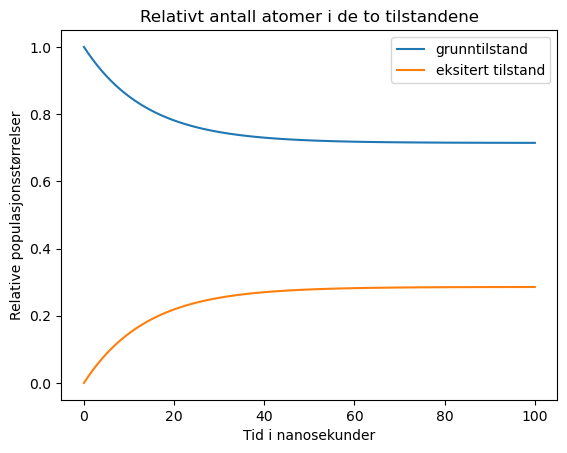

In [5]:
plt.plot(np.arange(v.shape[1]), v[0], label='grunntilstand')
plt.plot(np.arange(v.shape[1]), v[1], label='eksitert tilstand')
plt.legend()
plt.xlabel('Tid i nanosekunder')
plt.ylabel('Relative populasjonsstørrelser')
plt.title('Relativt antall atomer i de to tilstandene');